

---
**Problem Statement:** Recurrent neural network (RNN) Use the Google stock prices dataset and design a time
series analysis and prediction system using RNN.


In [1]:
# Step 1: Import the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Step 2: Load the Training Dataset
data = pd.read_csv('Google_Stock_Price_Test.csv')

data.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_14436\2962043090.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
# Data Preprocessing
training_data = data.iloc[:, 1:2].values  # Selecting 'Open' column
scaler = MinMaxScaler(feature_range=(0, 1))
training_data_scaled = scaler.fit_transform(training_data)



In [ ]:
# Prepare data for LSTM
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:(i + sequence_length), 0])
        y.append(data[i + sequence_length, 0])
    return np.array(X), np.array(y)

sequence_length = 60  # Length of input sequences
X_train, y_train = create_sequences(training_data_scaled, sequence_length)

# Reshape input data for LSTM [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))



In [ ]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))  # Add dropout regularization
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))  # Add dropout regularization
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
137/137 [==============================] - 6s 10ms/step - loss: 0.0036
Epoch 2/20
137/137 [==============================] - 1s 8ms/step - loss: 0.0011
Epoch 3/20
137/137 [==============================] - 1s 8ms/step - loss: 8.3442e-04
Epoch 4/20
137/137 [==============================] - 1s 8ms/step - loss: 7.2719e-04
Epoch 5/20
137/137 [==============================] - 1s 8ms/step - loss: 8.4341e-04
Epoch 6/20
137/137 [==============================] - 1s 8ms/step - loss: 6.4404e-04
Epoch 7/20
137/137 [==============================] - 1s 8ms/step - loss: 7.3952e-04
Epoch 8/20
137/137 [==============================] - 1s 8ms/step - loss: 6.8052e-04
Epoch 9/20
137/137 [==============================] - 1s 8ms/step - loss: 6.2000e-04
Epoch 10/20
137/137 [==============================] - 1s 10ms/step - loss: 6.2841e-04
Epoch 11/20
137/137 [==============================] - 1s 11ms/step - loss: 7.0335e-04
Epoch 12/20
137/137 [==============================] - 1s 8ms/step -

In [ ]:
# Reshape the input data for inverse transformation
X_train_reshaped = X_train.reshape(-1, X_train.shape[1])  # Flatten the last dimension

# Inverse transform the input features
X_train_original_scale = scaler.inverse_transform(X_train_reshaped)

# Print the original scale of input features and predicted stock prices
print("Original scale of input features:", X_train_original_scale)
print("Predicted stock prices:", predicted_stock_price)


Original scale of input features: [[  50.050049   50.555557   55.430431 ...   87.137138   85.420418
    84.649651]
 [  50.555557   55.430431   55.675674 ...   85.420418   84.649651
    92.70771 ]
 [  55.430431   55.675674   52.532532 ...   84.649651   92.70771
    90.315315]
 ...
 [2930.       2945.120117 2964.719971 ... 2662.97998  2668.48999
  2723.27002 ]
 [2945.120117 2964.719971 2932.889893 ... 2668.48999  2723.27002
  2722.030029]
 [2964.719971 2932.889893 2933.879883 ... 2723.27002  2722.030029
  2774.050049]]
Predicted stock prices: [[  65.371376]
 [  64.50882 ]
 [  63.983788]
 ...
 [2699.155   ]
 [2713.4639  ]
 [2732.5825  ]]


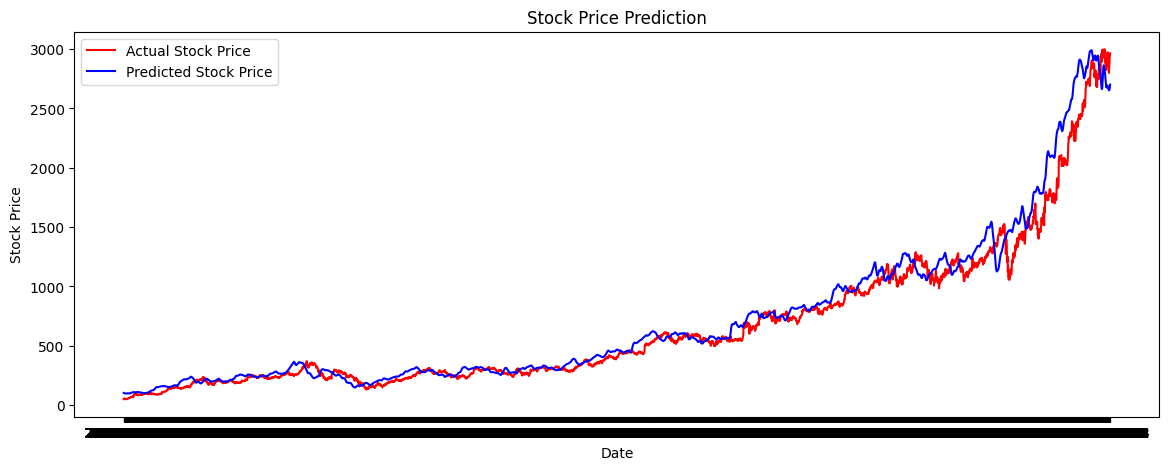

In [ ]:
# Visualize the results

plt.figure(figsize=(14,5))
plt.plot(data['Date'].iloc[sequence_length:], training_data[:-sequence_length], color='red', label='Actual Stock Price')
plt.plot(data['Date'].iloc[sequence_length:], predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
